# Self-Driving Car Engineer Nanodegree


## Project: **Perspective Transform** 

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle
import glob

from helper_functions import undistortImage, warpImage

%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


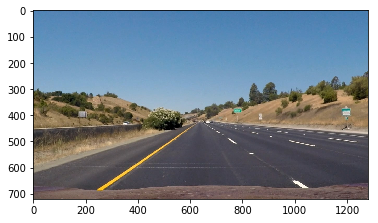

In [2]:
#reading in an image
test_image = mpimg.imread('test_images/straight_lines1.jpg')
img_size = (test_image.shape[1], test_image.shape[0])

#printing out some stats and plotting
print('This image is:', type(test_image), 'with dimensions:', test_image.shape)
plt.imshow(test_image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Undistort image

In [3]:
# Load the saved camera parameters
data = pickle.load(open("camera_params.pkl", "rb"))
camera_mtx = data[0]
camera_dist = data[1]

(-0.5, 1279.5, 719.5, -0.5)

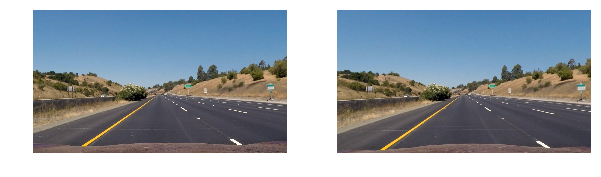

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(test_image)  
plt.axis('off')

# undistort the image
test_undist = undistortImage(test_image, camera_mtx, camera_dist)
plt.subplot(1,2,2)
plt.imshow(test_undist)    
plt.axis('off')

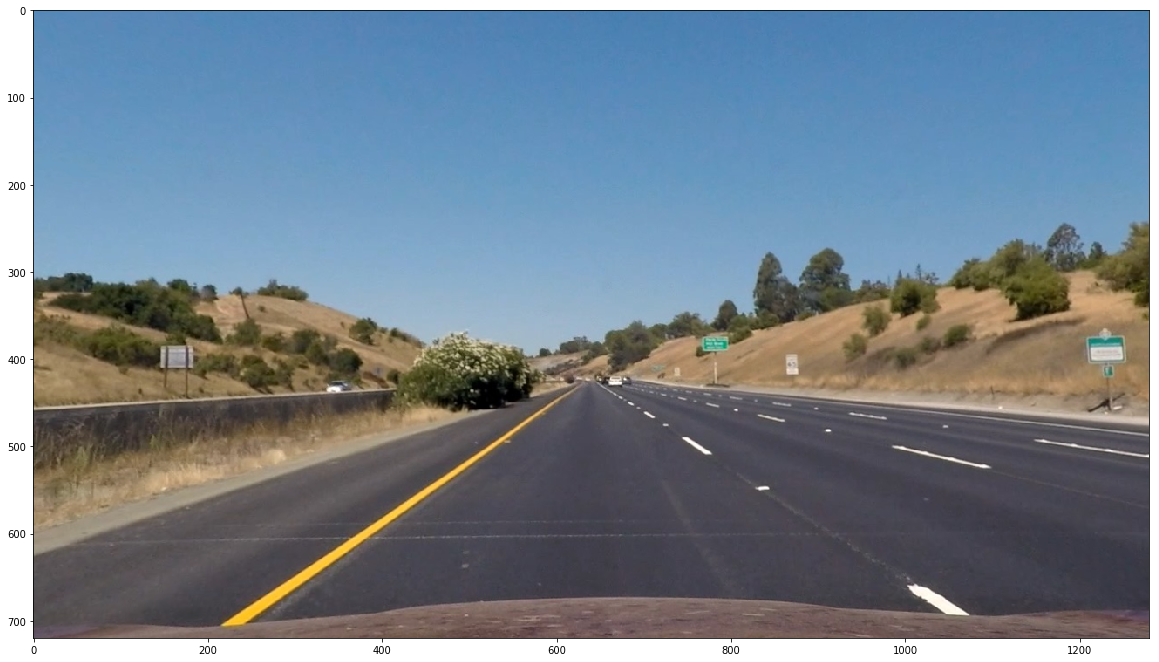

In [5]:
test_undist = undistortImage(test_image, camera_mtx, camera_dist)
plt.figure(figsize=(20, 15))
plt.imshow(test_undist)  

## Choose source and destination points for perspective transform

In [6]:
src_top_left = (570, 470)
src_top_right = (720, 470)
src_bottom_right = (1130, 720)
src_bottom_left = (200, 720)

dst_top_left = (335, 0)
dst_top_right= (965, 0)
dst_bottom_right = (980, 720)
dst_bottom_left = (320, 720)

src = np.float32([src_top_left, src_top_right, src_bottom_right, src_bottom_left])
dst = np.float32([dst_top_left, dst_top_right, dst_bottom_right, dst_bottom_left])

In [7]:
# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

transform_matrix = [M, Minv]
pickle.dump(transform_matrix, open("transform_matrix.pkl", "wb"))

In [8]:
test_warped = warpImage(test_undist, M, img_size)

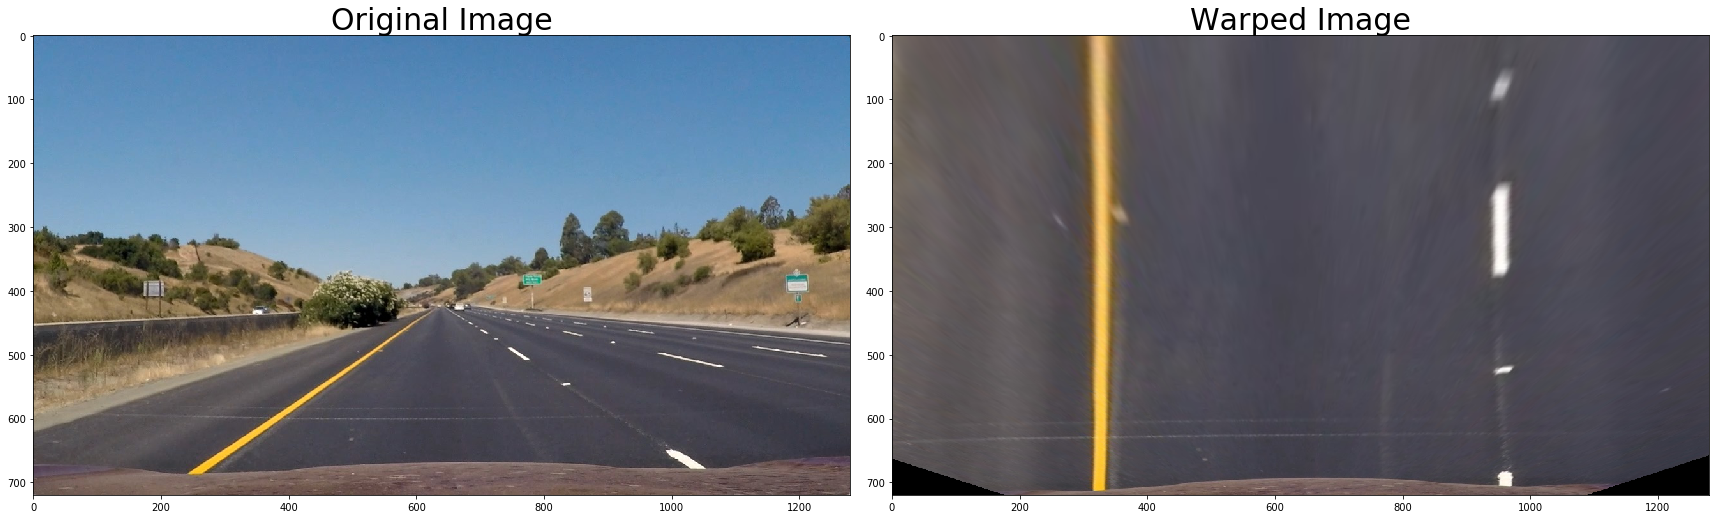

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(test_warped)
ax2.set_title('Warped Image', fontsize=30)

## Test perspective transform matrix on all other test images

In [12]:
# Load the saved perspective transform matrix
transform_matrix = pickle.load(open("transform_matrix.pkl", "rb"))
M = transform_matrix[0]
Minv = transform_matrix[1]

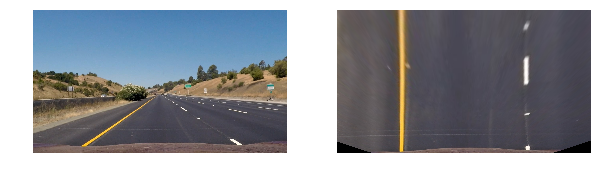

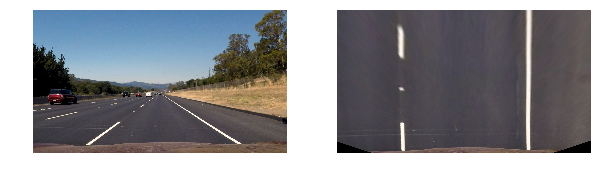

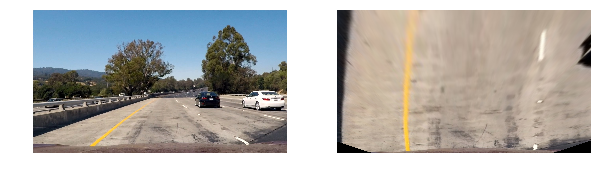

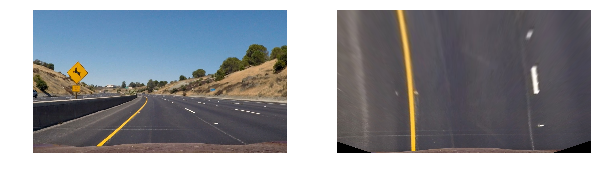

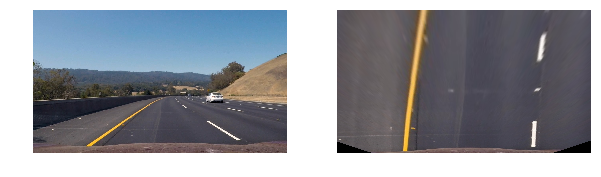

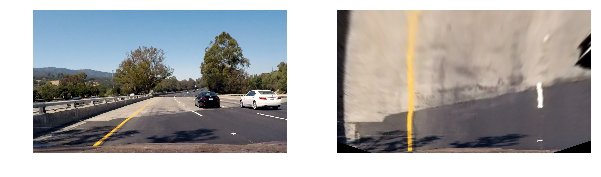

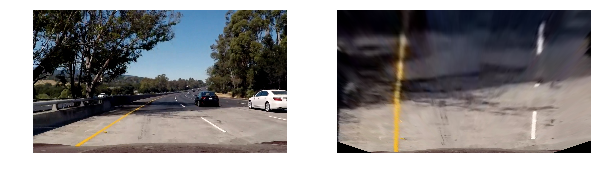

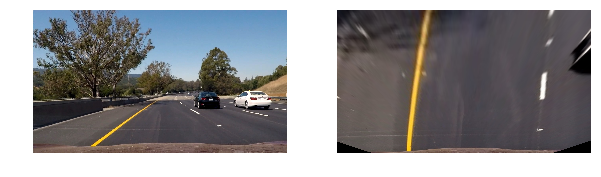

In [14]:
# Make a list of calibration images
images = glob.glob('test_images/*.jpg')
#print(images)

for fname in images:    
    plt.figure(figsize=(10, 5))
    
    # Read in each image
    img = mpimg.imread(fname)
    plt.subplot(1,2,1)
    plt.imshow(img)  
    plt.axis('off')
        
    # undistort the image
    undist = undistortImage(img, camera_mtx, camera_dist)
    warped = warpImage(undist, M, img_size)
    plt.subplot(1,2,2)
    plt.imshow(warped)    
    plt.axis('off')